In [1]:
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.tree as tree
import graphviz 
import pydotplus

from sklearn import model_selection
from sklearn.metrics import accuracy_score

C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#FOR MODEL SELECTION
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [3]:
import os
import pandas as pd
import numpy as np
import math 
import statsmodels as sm
import winsound

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Locate Data

In [4]:
cwd=os.getcwd()
print (cwd)


C:\Users\zafri\Documents\COGS 118A\final


In [5]:
def data_locate(rel_path_to_input,a):
    cwd = os.getcwd()
    stem=cwd
    for i in range(a):
        stem=os.path.abspath(os.path.join(stem, '..'))
    data_loc=os.path.join(stem , rel_path_to_input)
    os.chdir(data_loc)
    sub_files = os.listdir(data_loc)
    print ("Current Directory: ", cwd)
    print ("Data location: " , data_loc)
    print (sub_files)
    return data_loc, sub_files

In [6]:
data_loc, sub_files=data_locate("Datasets/Adult", 0)

Current Directory:  C:\Users\zafri\Documents\COGS 118A\final
Data location:  C:\Users\zafri\Documents\COGS 118A\final\Datasets/Adult
['adult.data.txt', 'adult.names.txt', 'adult.test.txt', 'EEG Eye State.txt', 'EEG_OG_Data', 'EEG_OG_Data_results.csv', 'EEG_OG_Data___20', 'EEG_OG_Data___20.pdf', 'EEG_OG_Data___50', 'EEG_OG_Data___50.pdf', 'EEG_OG_Data___80', 'EEG_OG_Data___80.pdf']


# EEG Eye State Data Set 

#### 1. Peek at Data

In [7]:
Adult_OG_Data = pd.read_csv(
    "adult.data.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
DATASET='Adult_OG_Data'

In [8]:

Adult_OG_Data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


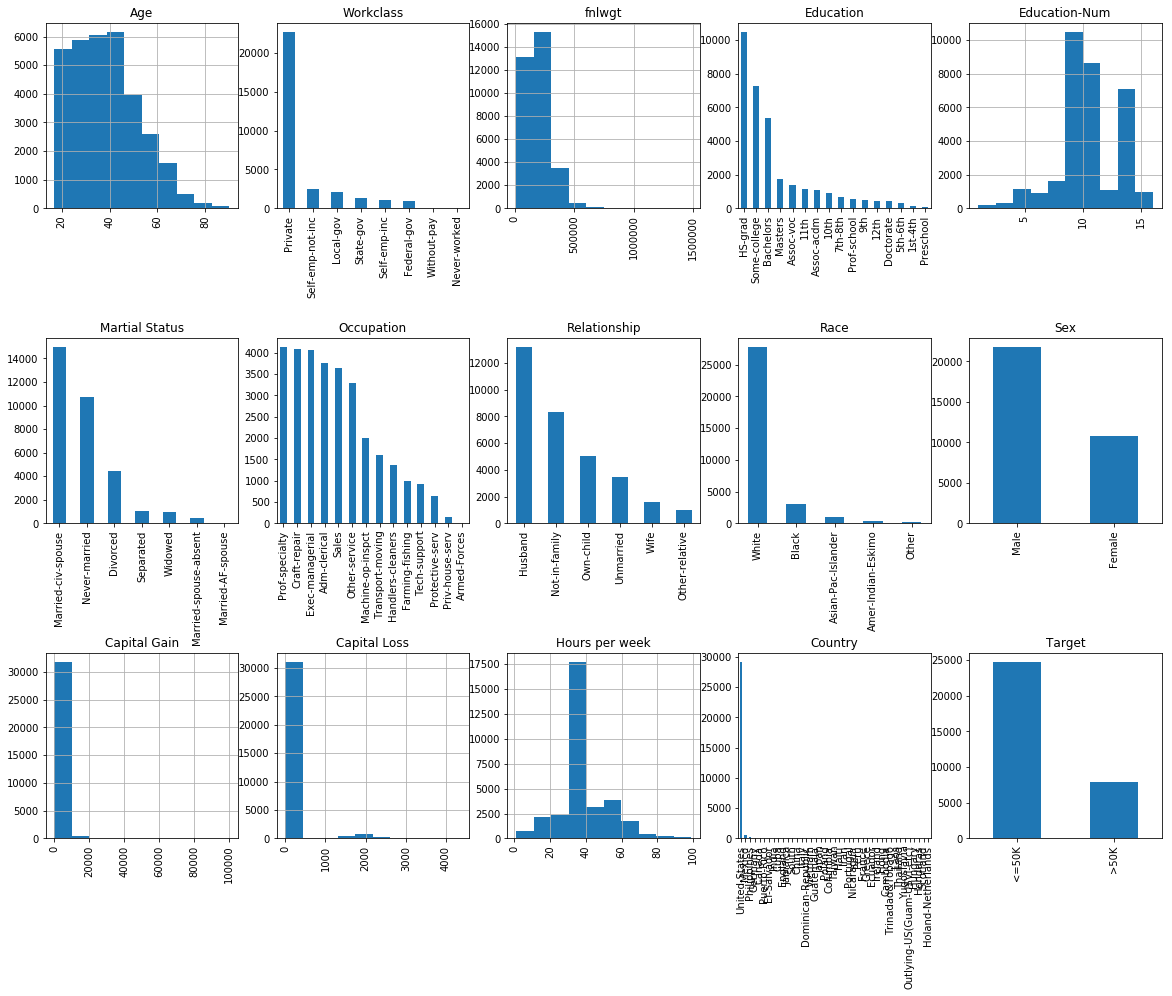

In [9]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(Adult_OG_Data.shape[1]) / cols)
for i, column in enumerate(Adult_OG_Data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if Adult_OG_Data.dtypes[column] == np.object:
        Adult_OG_Data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        Adult_OG_Data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

## Let's look at correlation between Occupation and Income

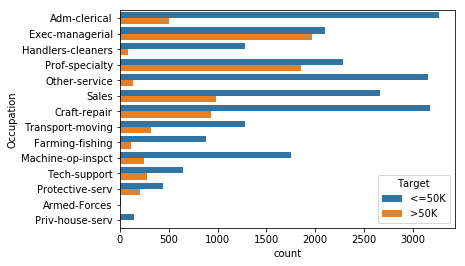

In [10]:
sns.countplot(y='Occupation', hue='Target', data=Adult_OG_Data,)

## Let's look at correlation between Hours Worked Per Week and Income


<p> We see that how many hours people work a week is a normal distribution. However, on average those that work above the mean make above 50K while on the lower end of the distribution, more people make less than 50K</p>

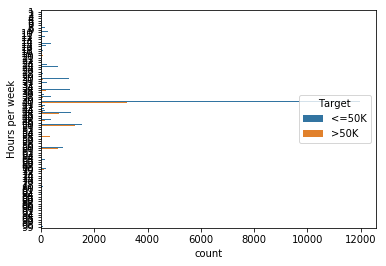

In [11]:
sns.countplot(y='Hours per week', hue='Target', data=Adult_OG_Data,)

# Let's look at correlation across all variables


In [12]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    cax=ax.matshow(corr, cmap='GnBu')
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.colorbar(cax)
    plt.show()

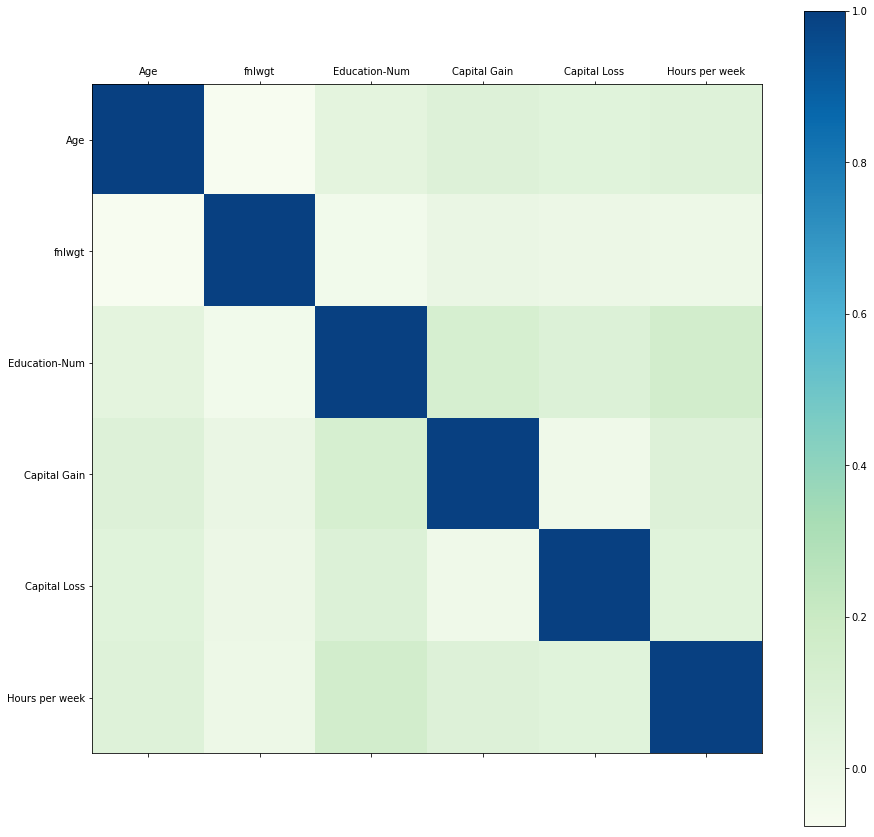

In [13]:
plot_correlation(Adult_OG_Data, size=15)

#### Let's Clean up the data

In [14]:
NAN_index_list=Adult_OG_Data[Adult_OG_Data.isnull().any(axis=1)].index
print("Number of Samples in Original Dataset: %s" % len(Adult_OG_Data))
Adult_OG_Data=Adult_OG_Data.drop(NAN_index_list, axis=0)
print("Number of Samples after removal of NAN values: %s" % len(Adult_OG_Data))


Number of Samples in Original Dataset: 32561
Number of Samples after removal of NAN values: 30162


In [15]:
#Dropping Education
#Redundant: Also included in Education_num
Adult_OG_Data=Adult_OG_Data.drop("Education", axis=1)


In [16]:
Adult_OG_Data.head()

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
print (Adult_OG_Data.shape)

(30162, 14)


# Let's change all our string labels to numerical labels

In [18]:
def re_label_data(df, col_list):
    dict_of_label_dict={}
    label_dict={}
    for i in col_list:
        label_names=df[str(i)].unique()
        for j in range(len(label_names)):
            label_dict[label_names[j]] = j
        dict_of_label_dict[i]=label_dict
    
    
    df.replace(dict_of_label_dict, inplace=True)

    return dict_of_label_dict, df


In [19]:
re_label_data(Adult_OG_Data, ["Workclass","Martial Status","Occupation", "Relationship", "Race", "Sex",  "Country", "Target"])
Adult_OG_Data.head()

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,13,1,3,2,1,1,0,0,40,1,0


#### Average Single or Married based
closer to 1: more >50k <br>
closer to 0: more <50k

In [20]:
Adult_OG_Data[['Martial Status','Target']].groupby(['Martial Status']).mean()

,Target
Martial Status,
0,0.048324
1,0.454959
2,0.107262
3,0.083784
4,0.070288
5,0.476190
6,0.096735


#### Average years of education for each Target Class

In [21]:
Adult_OG_Data[['Education-Num','Target']].groupby(["Target"]).mean()

,Education-Num
Target,
0,9.629116
1,11.606420


##### My computer was not powerful enough to complete the analysis on the complete dataset. As such, I have sampled 5000 points from the entire dataset to run the algorithm on as done by Caruana and Niculescu-Mizil.

## Sample


In [22]:
Adult_OG_Data=Adult_OG_Data.sample(n=1000, random_state=4)

In [23]:
Adult_OG_Data.shape

(1000, 14)

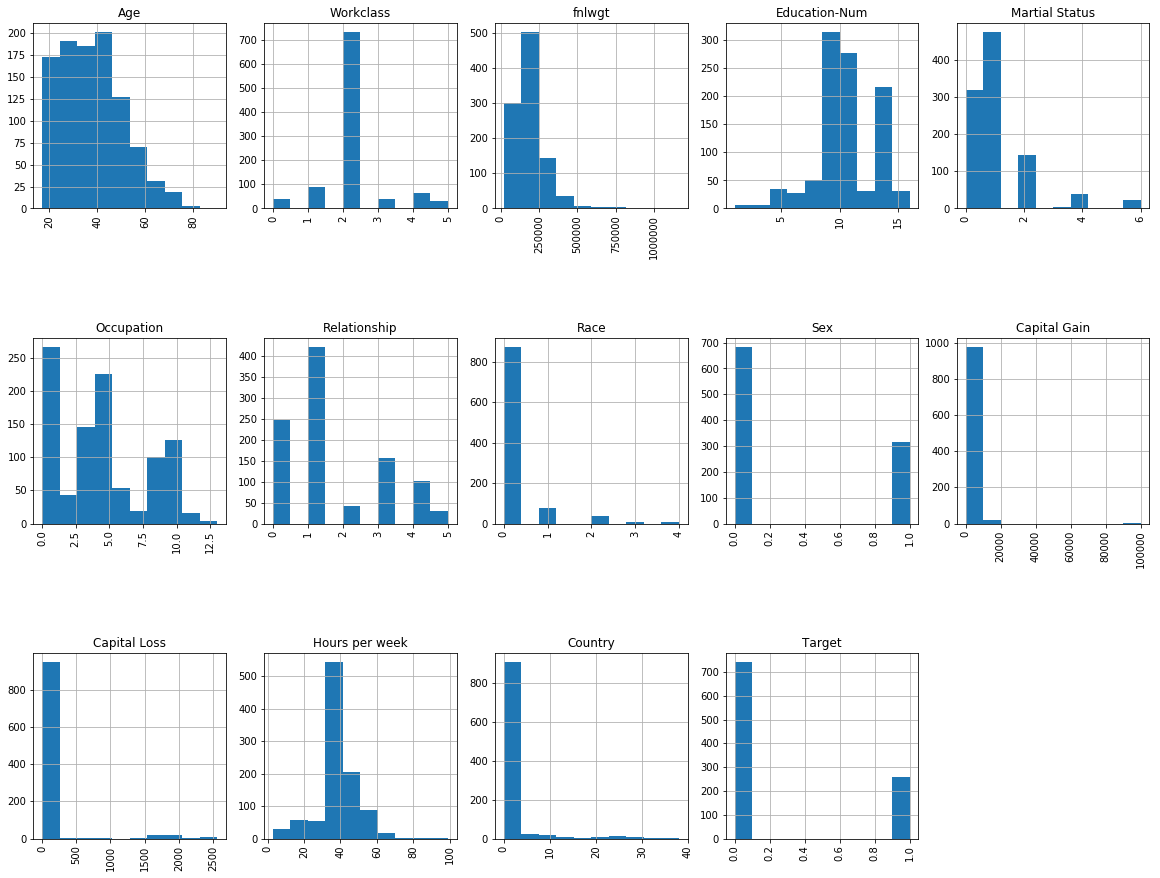

In [24]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(Adult_OG_Data.shape[1]) / cols)
for i, column in enumerate(Adult_OG_Data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if Adult_OG_Data.dtypes[column] == np.object:
        Adult_OG_Data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        Adult_OG_Data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

_____________________________________________________________________________________________________________
# Functions
_____________________________________________________________________________________________________________

In [25]:
#SPLIT DATA INTO TEST AND TRAINVAL
def split_Data_TV_Test(df,class_col, test_):
    X= df.drop([str(class_col)],axis=1)
    Y=df[str(class_col)]
    
    test_split_size=test_
    #Creation of Train and Test dataset
    X_TV, X_test, y_TV, y_test = train_test_split(X,Y,test_size=test_split_size,random_state=22)
    train_=round((1-test_)*100)
    print ("Train: {0}% Test: {1}%".format(train_,(test_*100)))
    print ("Train/Validation dataset: {0}  {1}".format(X_TV.shape, y_TV.shape))
    print ("Test dataset: {0}  {1}".format(X_test.shape, y_test.shape))
    return X_TV, X_test, y_TV, y_test, train_

In [26]:
#SPLIT DATA INTO TRAIN AND VAL
def split_Data_T_V_(X_tv, y_tv, val_):
    val_split_size=val_
    #Creation of Train and Test dataset
    X_Tr, X_val, y_Tr, y_val = train_test_split(X_tv,y_tv,test_size=val_split_size,random_state=22)
   
    print ("Train: {0}% Validation: {1}%".format(round((1-val_)*100),(val_*100)))
    print ("Train dataset: {0}  {1}".format(X_Tr.shape, y_Tr.shape))
    print ("Validation dataset: {0}  {1}".format(X_val.shape, y_val.shape))

    return X_Tr, X_val, y_Tr, y_val

In [27]:
def Model_Selection(X_TV, y_TV, val_):
    models = []
    names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

    models.append((LogisticRegression()))
    models.append((RandomForestClassifier(n_estimators=100)))
    models.append((MLPClassifier()))
    models.append((GaussianNB()))
    models.append((DecisionTreeClassifier()))
    models.append((SVC()))




    X_Tr, X_val, y_Tr, y_val=split_Data_T_V_(X_TV, y_TV, val_)
    rand_ints=[35,56,82]
    for r in range(len(rand_ints)):
        kfold = model_selection.KFold(n_splits=5,random_state=rand_ints[r])
        print ('-'*40)
        print ('Random kfold selection #{0}'.format(r+1))

        for i in range(0,len(models)):    
            cv_result = model_selection.cross_val_score(models[i],X_Tr,y_Tr,cv=kfold,scoring='accuracy')
            score=models[i].fit(X_Tr,y_Tr)
            prediction = models[i].predict(X_val)
            acc_score = accuracy_score(y_val,prediction)     
        
            print ('{0}: {1}'.format(names[i],acc_score))

    duration = 1000  # millisecond
    freq = 500  # Hz
    winsound.Beep(freq, duration)

In [28]:
def Linear_SVM_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]},
                        {'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]},
                        {'kernel': ['linear'],'C': [10**-3,10**-1,1,10,100]}]
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(svm.SVC(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [29]:
def Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, best_param, Accuracies_DF):
    clf =svm.SVC(kernel='linear', C=best_param)
    clf.fit(X_TV, y_TV)
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF

In [30]:
def Decision_Tree_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'max_depth': (3, 5, 7)},
                        {'max_depth': (3, 5, 7)},
                        {'max_depth': (3, 5, 7)}]
    
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(tree.DecisionTreeClassifier(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
         #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [38]:
def Decision_Tree_TEST(DATASET,df,train_, X_TV, y_TV, X_test, y_test, best_param, Accuracies_DF):
    
    
    labels=Adult_OG_Data.columns
    labels=labels.drop("Target")
    
    clf =tree.DecisionTreeClassifier(max_depth=best_param)
    clf.fit(X_TV, y_TV) 
    
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=labels,  
                         class_names=['open','close'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render(str(DATASET)+'___'+str(train_))
    
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    
    
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF

In [39]:
def Random_Forest_GRID_Search(DATASET, df,class_col, test_):
    X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(df,class_col, test_)
    #3 Trials
    tuned_parameters = [{'max_depth': range(1,10,2), 'n_estimators':(10,50,100)},
                        {'max_depth': range(1,10,2), 'n_estimators':(10,50,100)},
                        {'max_depth': range(1,10,2), 'n_estimators':(10,50,100)}]
    
    #Accuracy optimized
    #Cross Validation=3
    scores = 'accuracy'
    c=0
    data_all=[]
    for parameter in tuned_parameters:
        print("# Tuning hyper-parameters for %s" % scores)
        print()

        clf = GridSearchCV(RandomForestClassifier(), parameter, cv=3,scoring=scores)
        clf.fit(X_TV, y_TV)
        c+=1
    
    
        print("Trial # {0}".format(c))
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
         #write data to a CSV 
        #outputs 
        
        # DF | Train % | Test % 
        row1=[DATASET, train_, test_ ]
        #TV | Len(X_TV) | Len(y_TV)
        row2=[ "Training/Validation", "#TV Feature Samples", "#TV Class Labels"]
        row3=[ "",X_TV.shape, y_TV.shape ]

        #Test | Len(X_Test) | Len(y_Test)
        row4=[ "Test", "#Test Feature Samples", "#Test Class Labels"]
        row5=[ "",X_test.shape, y_test.shape ]
        #Trial #         #Best Parameter: 
        row6=['Trial/ Best Parameter', c, clf.best_params_]
        #Grid Scores=
        
        Grid_of_scores=[]
        row7=["Training Accuracies","_","_"]
        row8=["Mean", "Standard Deviation", "Parameter"]
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
            Grid_of_scores.append([mean, std * 2, params])
        
        data=[row1, row2, row3, row4,row5, row6, row7, row8]
        for i in data:
            data_all.append(i)
        for i in Grid_of_scores:
            data_all.append(i) 
            
        #SAVE RESULTS
    output=pd.DataFrame(data=data_all)
        
    return output

In [40]:
def Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, Best_depth, Best_n, Accuracies_DF):
    clf =RandomForestClassifier(max_depth=Best_depth, n_estimators=Best_n)
    clf.fit(X_TV, y_TV)
    y_pred=clf.predict(X_test)
    Test_accuracy=(accuracy_score(y_test, y_pred, normalize=False))/(len(y_test))
    print (Test_accuracy)
    num=[len(Accuracies_DF)]
    df3 = pd.DataFrame({0: "Test Accuracy",
                        1: Test_accuracy , 
                        2: "_____________"}, index=[num])
    
    
    Accuracies_DF=Accuracies_DF.append(df3)
    return Accuracies_DF



### Splits include 
    - 20% TV, 80% Test
    - 50% TV, 50% Test
    - 80% TV, 20% Test
    
# Split 1 : 20% Train, 80% Test    

In [41]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(Adult_OG_Data, "Target" , .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (200, 13)  (200,)
Test dataset: (800, 13)  (800,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [42]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (150, 13)  (150,)
Validation dataset: (50, 13)  (50,)
----------------------------------------
Random kfold selection #1
LR: 0.64
Random Forest: 0.74
Neural Network: 0.36
GaussianNB: 0.66
DecisionTreeClassifier: 0.8
SVM: 0.6
----------------------------------------
Random kfold selection #2
LR: 0.64
Random Forest: 0.72
Neural Network: 0.6
GaussianNB: 0.66
DecisionTreeClassifier: 0.8
SVM: 0.6
----------------------------------------
Random kfold selection #3
LR: 0.64
Random Forest: 0.8
Neural Network: 0.6
GaussianNB: 0.66
DecisionTreeClassifier: 0.8
SVM: 0.6


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [43]:
#SP1_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET, Adult_OG_Data, "Target", .8)

In [44]:
#SP1_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP1_SVM_Accuracies_DF)

#### Decision Tree

In [45]:
SP1_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET,  Adult_OG_Data, "Target", .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (200, 13)  (200,)
Test dataset: (800, 13)  (800,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.795 (+/-0.032) for {'max_depth': 3}
0.800 (+/-0.066) for {'max_depth': 5}
0.780 (+/-0.055) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.795 (+/-0.032) for {'max_depth': 3}
0.805 (+/-0.069) for {'max_depth': 5}
0.800 (+/-0.066) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.795 (+/-0.032) for {'max_depth': 3}
0.800 (+/-0.066) for {'max_depth': 5}
0.780 (+/-0.062) for {'max_depth': 7}


In [46]:
SP1_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,Adult_OG_Data, train_, X_TV, y_TV, X_test, y_test, 5, SP1_Decision_Tree_Accuracies_DF)

0.76875


#### Random Forest

In [47]:
SP1_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET, Adult_OG_Data,"Target", .8)

Train: 20% Test: 80.0%
Train/Validation dataset: (200, 13)  (200,)
Test dataset: (800, 13)  (800,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 5, 'n_estimators': 100}

Grid scores on development set:

0.725 (+/-0.006) for {'max_depth': 1, 'n_estimators': 10}
0.725 (+/-0.006) for {'max_depth': 1, 'n_estimators': 50}
0.725 (+/-0.006) for {'max_depth': 1, 'n_estimators': 100}
0.800 (+/-0.066) for {'max_depth': 3, 'n_estimators': 10}
0.820 (+/-0.005) for {'max_depth': 3, 'n_estimators': 50}
0.800 (+/-0.026) for {'max_depth': 3, 'n_estimators': 100}
0.830 (+/-0.033) for {'max_depth': 5, 'n_estimators': 10}
0.830 (+/-0.090) for {'max_depth': 5, 'n_estimators': 50}
0.835 (+/-0.067) for {'max_depth': 5, 'n_estimators': 100}
0.830 (+/-0.017) for {'max_depth': 7, 'n_estimators': 10}
0.820 (+/-0.053) for {'max_depth': 7, 'n_estimators': 50}
0.830 (+/-0.033) for {'max_depth': 7, 'n_estimators': 100}
0.835 (+/-0.102) for {'max_depth

In [48]:
SP1_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 5, 100 , SP1_Random_Forest_Accuracies_DF)

0.83


# Split 2 : 50% Train, 50% Test    

In [50]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(Adult_OG_Data, "Target" , .5)

Train: 50% Test: 50.0%
Train/Validation dataset: (500, 13)  (500,)
Test dataset: (500, 13)  (500,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [51]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (375, 13)  (375,)
Validation dataset: (125, 13)  (125,)
----------------------------------------
Random kfold selection #1
LR: 0.728
Random Forest: 0.8
Neural Network: 0.704
GaussianNB: 0.712
DecisionTreeClassifier: 0.792
SVM: 0.704
----------------------------------------
Random kfold selection #2
LR: 0.728
Random Forest: 0.84
Neural Network: 0.704
GaussianNB: 0.712
DecisionTreeClassifier: 0.808
SVM: 0.704
----------------------------------------
Random kfold selection #3
LR: 0.728
Random Forest: 0.824
Neural Network: 0.704
GaussianNB: 0.712
DecisionTreeClassifier: 0.784
SVM: 0.704


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [ ]:
SP2_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET, Adult_OG_Data, "Target" , .5)

In [ ]:
SP2_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP2_SVM_Accuracies_DF)

#### Decision Tree

In [53]:
SP2_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET, Adult_OG_Data, "Target" ,.5)

Train: 50% Test: 50.0%
Train/Validation dataset: (500, 13)  (500,)
Test dataset: (500, 13)  (500,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

0.808 (+/-0.051) for {'max_depth': 3}
0.786 (+/-0.036) for {'max_depth': 5}
0.776 (+/-0.065) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

0.806 (+/-0.048) for {'max_depth': 3}
0.782 (+/-0.031) for {'max_depth': 5}
0.782 (+/-0.054) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

0.808 (+/-0.051) for {'max_depth': 3}
0.788 (+/-0.039) for {'max_depth': 5}
0.782 (+/-0.057) for {'max_depth': 7}


In [55]:
SP2_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,Adult_OG_Data, train_, X_TV, y_TV, X_test, y_test, 7 , SP2_Decision_Tree_Accuracies_DF)

0.814


#### Random Forest

In [56]:
SP2_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET, Adult_OG_Data, "Target" ,.5)

Train: 50% Test: 50.0%
Train/Validation dataset: (500, 13)  (500,)
Test dataset: (500, 13)  (500,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 9, 'n_estimators': 100}

Grid scores on development set:

0.758 (+/-0.031) for {'max_depth': 1, 'n_estimators': 10}
0.752 (+/-0.019) for {'max_depth': 1, 'n_estimators': 50}
0.742 (+/-0.001) for {'max_depth': 1, 'n_estimators': 100}
0.808 (+/-0.048) for {'max_depth': 3, 'n_estimators': 10}
0.814 (+/-0.038) for {'max_depth': 3, 'n_estimators': 50}
0.810 (+/-0.043) for {'max_depth': 3, 'n_estimators': 100}
0.838 (+/-0.063) for {'max_depth': 5, 'n_estimators': 10}
0.836 (+/-0.056) for {'max_depth': 5, 'n_estimators': 50}
0.834 (+/-0.054) for {'max_depth': 5, 'n_estimators': 100}
0.818 (+/-0.065) for {'max_depth': 7, 'n_estimators': 10}
0.840 (+/-0.087) for {'max_depth': 7, 'n_estimators': 50}
0.842 (+/-0.065) for {'max_depth': 7, 'n_estimators': 100}
0.832 (+/-0.051) for {'max_depth

In [59]:
SP2_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 9, 100 , SP2_Random_Forest_Accuracies_DF)

0.848


# Split 3 : 80% Train, 20% Test    

In [60]:
X_TV, X_test, y_TV, y_test, train_ =split_Data_TV_Test(Adult_OG_Data, "Target" , .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (800, 13)  (800,)
Test dataset: (200, 13)  (200,)


#### Model Selection 

Lets see how different classifiers perform on set

k-fold implementation (k=3)

In [61]:
#val_=.25 
Model_Selection(X_TV, y_TV, .25)

Train: 75% Validation: 25.0%
Train dataset: (600, 13)  (600,)
Validation dataset: (200, 13)  (200,)
----------------------------------------
Random kfold selection #1
LR: 0.785
Random Forest: 0.865
Neural Network: 0.79
GaussianNB: 0.775
DecisionTreeClassifier: 0.765
SVM: 0.775
----------------------------------------
Random kfold selection #2
LR: 0.785
Random Forest: 0.865
Neural Network: 0.78
GaussianNB: 0.775
DecisionTreeClassifier: 0.78
SVM: 0.775
----------------------------------------
Random kfold selection #3
LR: 0.785
Random Forest: 0.86
Neural Network: 0.775
GaussianNB: 0.775
DecisionTreeClassifier: 0.78
SVM: 0.775


  #### Linear SVM
  
  <p> Implementation using sklearn svm.SVC(Kernel='Linear') </p>

In [ ]:
SP3_SVM_Accuracies_DF=Linear_SVM_GRID_Search(DATASET,Adult_OG_Data, "Target" ,  .2)

In [ ]:
SP3_SVM_Accuracies_DF=Linear_SVM_TEST(DATASET,X_TV, y_TV, X_test, y_test, 0.001 , SP3_SVM_Accuracies_DF)

#### Decision Tree

In [64]:
SP3_Decision_Tree_Accuracies_DF=Decision_Tree_GRID_Search(DATASET, Adult_OG_Data, "Target" ,  .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (800, 13)  (800,)
Test dataset: (200, 13)  (200,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.794 (+/-0.011) for {'max_depth': 3}
0.825 (+/-0.017) for {'max_depth': 5}
0.821 (+/-0.013) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 2
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.794 (+/-0.011) for {'max_depth': 3}
0.824 (+/-0.021) for {'max_depth': 5}
0.824 (+/-0.019) for {'max_depth': 7}
# Tuning hyper-parameters for accuracy

Trial # 3
Best parameters set found on development set:

{'max_depth': 5}

Grid scores on development set:

0.794 (+/-0.011) for {'max_depth': 3}
0.825 (+/-0.017) for {'max_depth': 5}
0.820 (+/-0.017) for {'max_depth': 7}


In [66]:
SP3_Decision_Tree_Accuracies_DF=Decision_Tree_TEST(DATASET,Adult_OG_Data, train_, X_TV, y_TV, X_test, y_test, 5 , SP3_Decision_Tree_Accuracies_DF)

0.835


#### Random Forest

In [67]:
SP3_Random_Forest_Accuracies_DF=Random_Forest_GRID_Search(DATASET,Adult_OG_Data, "Target" ,  .2)

Train: 80% Test: 20.0%
Train/Validation dataset: (800, 13)  (800,)
Test dataset: (200, 13)  (200,)
# Tuning hyper-parameters for accuracy

Trial # 1
Best parameters set found on development set:

{'max_depth': 7, 'n_estimators': 50}

Grid scores on development set:

0.766 (+/-0.029) for {'max_depth': 1, 'n_estimators': 10}
0.759 (+/-0.008) for {'max_depth': 1, 'n_estimators': 50}
0.762 (+/-0.017) for {'max_depth': 1, 'n_estimators': 100}
0.807 (+/-0.003) for {'max_depth': 3, 'n_estimators': 10}
0.815 (+/-0.006) for {'max_depth': 3, 'n_estimators': 50}
0.809 (+/-0.017) for {'max_depth': 3, 'n_estimators': 100}
0.834 (+/-0.019) for {'max_depth': 5, 'n_estimators': 10}
0.853 (+/-0.019) for {'max_depth': 5, 'n_estimators': 50}
0.849 (+/-0.013) for {'max_depth': 5, 'n_estimators': 100}
0.843 (+/-0.006) for {'max_depth': 7, 'n_estimators': 10}
0.856 (+/-0.010) for {'max_depth': 7, 'n_estimators': 50}
0.856 (+/-0.019) for {'max_depth': 7, 'n_estimators': 100}
0.836 (+/-0.003) for {'max_depth'

In [68]:
SP3_Random_Forest_Accuracies_DF=Random_Forest_TEST(DATASET,X_TV, y_TV, X_test, y_test, 9, 100 , SP3_Random_Forest_Accuracies_DF)

0.84


# Export Results 

In [70]:
#list_of_Data_Results=[SP1_SVM_Accuracies_DF,SP1_Decision_Tree_Accuracies_DF,SP1_Random_Forest_Accuracies_DF,
#                      SP2_SVM_Accuracies_DF,SP2_Decision_Tree_Accuracies_DF,SP2_Random_Forest_Accuracies_DF,
#                      SP3_SVM_Accuracies_DF,SP3_Decision_Tree_Accuracies_DF,SP3_Random_Forest_Accuracies_DF]


list_of_Data_Results=[SP1_Decision_Tree_Accuracies_DF,SP1_Random_Forest_Accuracies_DF,
                      SP2_Decision_Tree_Accuracies_DF,SP2_Random_Forest_Accuracies_DF,
                      SP3_Decision_Tree_Accuracies_DF,SP3_Random_Forest_Accuracies_DF]


RESULTS = pd.concat(list_of_Data_Results, axis=0, ignore_index=True)



In [71]:
RESULTS.to_csv((str(DATASET)+'_results.csv'))